In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
def processData(filename):
    name = "final_data/mention/"+filename
    return pd.read_json(name)

df = processData('wallstreetbets_mention.json').T
stock_price = pd.read_csv('amc_stock_prices.csv')
stock_price = stock_price.iloc[21:]
df.sort_index(inplace=True)
df.drop(df.tail(1).index,inplace=True)
df.index.name = 'date'
mentions = df['AMC'].to_dict()
mentions.pop(501)
print(mentions)

stock_price

{101: 2.0, 102: 1.0, 103: 4.0, 104: 2.0, 105: 4.0, 106: 3.0, 107: 2.0, 108: 3.0, 109: 2.0, 110: 1.0, 111: 7.0, 112: 9.0, 113: 3.0, 114: 10.0, 115: 50.0, 116: 15.0, 117: 18.0, 118: 21.0, 119: 77.0, 120: 28.0, 121: 26.0, 122: 126.0, 123: 53.0, 124: 43.0, 125: 522.0, 126: 144.0, 127: 6653.0, 128: 11181.0, 129: 6555.0, 130: 3106.0, 131: 530.0, 201: 209.0, 202: 1553.0, 203: 489.0, 204: 743.0, 205: 599.0, 206: 89.0, 207: 74.0, 208: 581.0, 209: 470.0, 210: 88.0, 211: 413.0, 212: 287.0, 213: 121.0, 214: 114.0, 215: 160.0, 216: 60.0, 217: 66.0, 218: 207.0, 219: 135.0, 220: 94.0, 221: 114.0, 222: 337.0, 223: 142.0, 224: 163.0, 225: 247.0, 226: 204.0, 227: 70.0, 228: 62.0, 301: 191.0, 302: 201.0, 303: 125.0, 304: 102.0, 305: 53.0, 306: 47.0, 307: 31.0, 308: 133.0, 309: 396.0, 310: 825.0, 311: 355.0, 312: 258.0, 313: 109.0, 314: 193.0, 315: 638.0, 316: 377.0, 317: 156.0, 318: 65.0, 319: 112.0, 320: 65.0, 321: 25.0, 322: 28.0, 323: 29.0, 324: 31.0, 325: 42.0, 326: 28.0, 327: 39.0, 328: 48.0, 329: 9

,Date,Open,High,Low,Close,Adj Close,Volume
21,2020-12-31,2.17,2.22,2.08,2.12,2.12,28234300
22,2021-01-04,2.20,2.20,2.00,2.01,2.01,29873800
23,2021-01-05,1.99,2.03,1.91,1.98,1.98,28148300
24,2021-01-06,2.03,2.23,1.97,2.01,2.01,67363300
25,2021-01-07,2.08,2.11,2.02,2.05,2.05,26150500
...,...,...,...,...,...,...,...
99,2021-04-26,10.69,11.96,10.57,11.50,11.50,78592900
100,2021-04-27,11.68,12.22,11.22,11.46,11.46,51629800
101,2021-04-28,10.85,11.39,10.65,10.85,10.85,39720500
102,2021-04-29,10.95,11.04,10.09,10.20,10.20,37782900


In [93]:
from collections import OrderedDict
plot_data_schema = {'Stock Price':[], '# of Mentions': []}

plot_data = pd.DataFrame(plot_data_schema)
change_dict = OrderedDict()

for index, row in stock_price.iterrows():
    dates = row['Date'].split('-')
    month = int(dates[1])
    day = int(dates[2])
    date_formatted = str(month)
    date_formatted += str(day).zfill(2)
    if date_formatted not in change_dict:
        change_dict[date_formatted] = row[-2]

change_dict['101'] = 2.12

month_dict = { '1':31, '2':28, '3':31, '4':30 }

for k, v in month_dict.items():
    for day in range(1, v + 1):
        date = int(k) * 100 + day
        cur_date = str(date)
        count = 31
        while str(date) not in change_dict and count > 0:
            date -= 1
            count -= 1
        if cur_date not in change_dict:
            change_dict[cur_date] = change_dict[str(date)]

change_dict = dict(sorted(change_dict.items()))

change_dict.pop('1231')

print(change_dict)

{'101': 2.12, '102': 2.12, '103': 2.12, '104': 2.009999990463257, '105': 1.9800000190734863, '106': 2.009999990463257, '107': 2.049999952316284, '108': 2.140000104904175, '109': 2.140000104904175, '110': 2.140000104904175, '111': 2.200000047683716, '112': 2.289999961853028, '113': 2.180000066757202, '114': 2.180000066757202, '115': 2.3299999237060547, '116': 2.3299999237060547, '117': 2.3299999237060547, '118': 2.3299999237060547, '119': 3.059999942779541, '120': 2.970000028610229, '121': 2.9800000190734863, '122': 3.509999990463257, '123': 3.509999990463257, '124': 3.509999990463257, '125': 4.420000076293945, '126': 4.960000038146973, '127': 19.899999618530277, '128': 8.630000114440918, '129': 13.260000228881836, '130': 13.260000228881836, '131': 13.260000228881836, '201': 13.300000190734863, '202': 7.820000171661377, '203': 8.970000267028809, '204': 7.090000152587891, '205': 6.829999923706055, '206': 6.829999923706055, '207': 6.829999923706055, '208': 6.179999828338623, '209': 5.5, '

In [94]:
plot_data = {'date':[], 'Stock Price':[], '# of Mentions': []}
for date, mention in mentions.items():
    plot_data['date'].append(str(date))
    plot_data['Stock Price'].append(change_dict[str(date)])
    plot_data['# of Mentions'].append(mention)

plot_df = pd.DataFrame()
plot_df['Date'] = plot_data['date']
plot_df['Stock Price'] = plot_data['Stock Price']
plot_df['# of Mentions'] = plot_data['# of Mentions']

plot_df.set_index('Date', inplace=True)
plot_df

,Stock Price,# of Mentions
Date,,
101,2.12,2.0
102,2.12,1.0
103,2.12,4.0
104,2.01,2.0
105,1.98,4.0
...,...,...
426,11.50,100.0
427,11.46,104.0
428,10.85,81.0


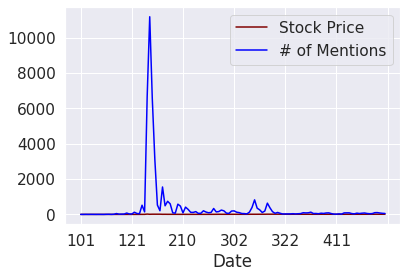

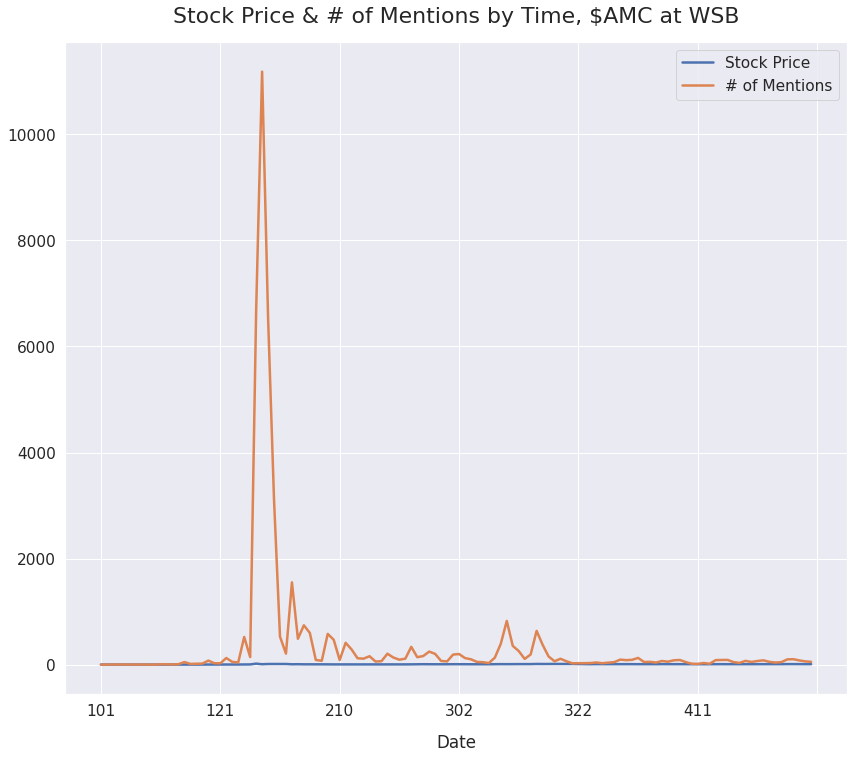

In [95]:
sns.set(font_scale=1.4)
color_dict = {'Stock Price': 'maroon', '# of Mentions': 'blue'}
plot_df.plot(color=[color_dict.get(x, '#333333') for x in plot_df.columns])
plot_df.plot(figsize=(14, 12), linewidth=2.5)
plt.xlabel("Date", labelpad=15)
plt.title("Stock Price & # of Mentions by Time, $AMC at WSB", y=1.02, fontsize=22);

<AxesSubplot:xlabel='Date', ylabel='Stock Price'>

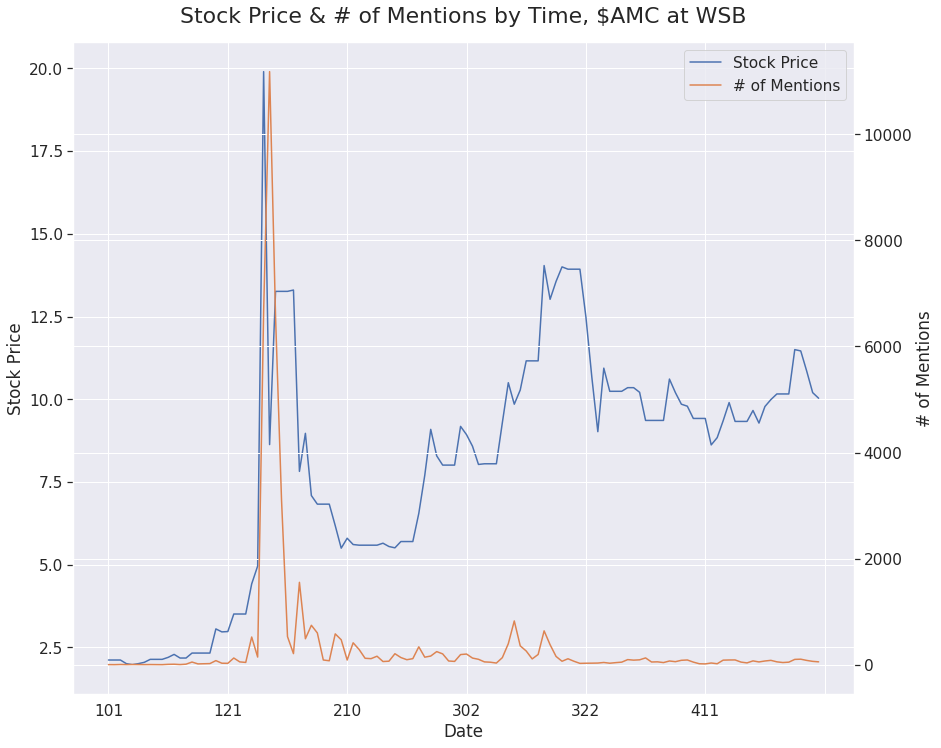

In [96]:
def plot_multi(data, cols=None, spacing=.1, **kwargs):

    from pandas.plotting._matplotlib.style import get_standard_colors

    # Get default color style from pandas - can be changed to any other color list
    if cols is None: cols = data.columns
    if len(cols) == 0: return
    colors = get_standard_colors(num_colors=len(cols))

    # First axis
    ax = data.loc[:, cols[0]].plot(label=cols[0], color=colors[0], **kwargs)
    ax.set_ylabel(ylabel=cols[0])
    lines, labels = ax.get_legend_handles_labels()

    for n in range(1, len(cols)):
        # Multiple y-axes
        ax_new = ax.twinx()
        ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
        data.loc[:, cols[n]].plot(ax=ax_new, label=cols[n], color=colors[n % len(colors)], **kwargs)
        ax_new.set_ylabel(ylabel=cols[n])
        
        # Proper legend position
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label

    plt.title("Stock Price & # of Mentions by Time, $AMC at WSB", y=1.02, fontsize=22);
    ax.legend(lines, labels, loc=0)
    return ax

plot_multi(plot_df, figsize=(14,12))